# Data

## ESG Data

In [103]:
import yfinance as yf
import pandas as pd

In [104]:
pip install yesg


In [105]:
import yesg


In [106]:
sp500 = pd.read_csv('https://raw.githubusercontent.com/datasets/s-and-p-500-companies/refs/heads/main/data/constituents.csv')
tickers = sp500['Symbol'].tolist()

In [107]:
sp500.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [108]:
import datetime as dt

In [109]:
import pandas as pd


data = []

for ticker in tickers:
    try:
        esginfo = yesg.get_historic_esg(ticker).dropna()
        data2020 = esginfo.loc[esginfo.index.year == 2020]
        data2020 = pd.DataFrame.to_dict(data2020)
        for k,v in data2020.items():
            for time,value in v.items():
              timestamp = time
              if k == "Total-Score":
                TotalScore = value
              elif k == "E-Score":
                EnvironmentalScore = value
              elif k == "S-Score":
                SocialScore = value
              elif k == "G-Score":
                GovernanceScore = value
        data.append({
            'Ticker': ticker,
            'Timestamp': timestamp,
            'Total Score': TotalScore,
            'Environmental Score': EnvironmentalScore,
            'Social Score': SocialScore,
            'Governance Score': GovernanceScore})
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Convert data to a DataFrame for easy analysis
esg_data = pd.DataFrame(data)

An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
Error fetching data for GOOG: 'NoneType' object has no attribute 'dropna'
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
Error fetching data for AMTM: 'NoneType' object has no attribute 'dropna'
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
Error fetching data for BRK.B: 'NoneType' object has no attribute 'dropna'
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
Error fetching data for BF.B: 'NoneType' object has no attribute 'dropna'
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
Error fetching data for FOX: 'NoneType' object has no attribute 'dropna'
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
Error fetching data for GEV: 'NoneType' object has no attrib

In [110]:
esg_data.dropna()

,Ticker,Timestamp,Total Score,Environmental Score,Social Score,Governance Score
0,MMM,2020-10-01,34.86,12.79,14.00,8.07
1,AOS,2020-10-01,32.56,9.53,14.92,8.12
2,ABT,2020-10-01,29.85,2.98,16.21,10.65
3,ABBV,2020-10-01,30.86,0.96,18.15,11.75
4,ACN,2020-10-01,11.24,0.55,4.98,5.71
...,...,...,...,...,...,...
488,XYL,2020-10-01,16.42,3.53,7.78,5.11
489,YUM,2020-10-01,18.14,3.16,10.54,4.45
490,ZBRA,2020-10-01,18.14,3.16,10.54,4.45
491,ZBH,2020-10-01,34.16,4.79,18.90,10.46


In [111]:
esg_data.head()

,Ticker,Timestamp,Total Score,Environmental Score,Social Score,Governance Score
0,MMM,2020-10-01,34.86,12.79,14.00,8.07
1,AOS,2020-10-01,32.56,9.53,14.92,8.12
2,ABT,2020-10-01,29.85,2.98,16.21,10.65
3,ABBV,2020-10-01,30.86,0.96,18.15,11.75
4,ACN,2020-10-01,11.24,0.55,4.98,5.71


In [112]:
esg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Ticker               493 non-null    object        
 1   Timestamp            493 non-null    datetime64[ns]
 2   Total Score          493 non-null    float64       
 3   Environmental Score  493 non-null    float64       
 4   Social Score         493 non-null    float64       
 5   Governance Score     493 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 23.2+ KB


## Stock Prices

In [113]:
import yfinance as yf

data = []
for ticker in esg_data["Ticker"].tolist():
  #company = yf.Ticker(ticker)
  try:
    stock = yf.download(ticker, start="2020-01-01")["Adj Close"]
    for k,v in stock.items():
      for time,value in v.items():
        timestamp = time
        close = value
        data.append({
          'Ticker': ticker,
          "Time":timestamp,
          "Close":close})
  except Exception as e:
    print(f"Error fetching data for {ticker}: {e}")


firm_data = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [114]:
firm_data.head()

,Ticker,Time,Close
0,MMM,2020-01-02,122.961037
1,MMM,2020-01-03,121.902168
2,MMM,2020-01-06,122.018303
3,MMM,2020-01-07,121.526459
4,MMM,2020-01-08,123.391350


In [115]:
firm_data['Time'] = pd.to_datetime(firm_data['Time'])
firm_data.set_index('Time', inplace = True)


In [116]:
#firm_data.to_csv('/content/drive/MyDrive/data/firm_data.csv', index=True)

In [117]:
#firm_data = pd.read_csv('/content/drive/MyDrive/data/firm_data.csv')

In [118]:
#from google.colab import drive
#drive.mount('/content/drive')

In [119]:
firm_data.head()

,Ticker,Close
Time,,
2020-01-02,MMM,122.961037
2020-01-03,MMM,121.902168
2020-01-06,MMM,122.018303
2020-01-07,MMM,121.526459
2020-01-08,MMM,123.391350


In [120]:

# Pivot the DataFrame
firm_data_pivoted = firm_data.pivot_table(index='Time', columns='Ticker', values='Close')

# Display the reshaped DataFrame
firm_data_pivoted=firm_data_pivoted.dropna(axis=1)
firm_data_pivoted.head()

Ticker,A,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Time,,,,,,,,,,,,,,,,,,,,,
2020-01-02,83.214867,72.796013,72.264893,79.689957,41.268997,195.263565,334.429993,109.912369,40.313679,153.205902,...,191.207993,24.381453,139.762268,54.000290,55.631168,75.240517,93.090309,139.626236,259.140015,129.208893
2020-01-03,81.878792,72.088310,71.578941,78.718460,41.221451,194.938370,331.809998,107.977509,40.234997,152.882080,...,191.254745,24.422932,137.689194,54.259987,55.183937,75.683388,92.798759,139.261230,256.049988,129.228180
2020-01-06,82.120819,72.662704,72.143837,79.130890,41.383106,193.665405,333.709991,106.708923,39.920254,153.088959,...,191.488739,24.373156,137.416687,54.182087,55.607643,75.193420,92.744110,138.456436,258.010010,128.236008
2020-01-07,82.372559,72.320969,71.732262,78.690964,41.040779,189.484192,333.390015,109.136597,39.439396,151.235992,...,191.095627,24.215536,138.068756,54.069546,55.152546,74.910721,92.908089,138.334763,256.470001,128.669434
2020-01-08,83.185822,73.484360,72.240669,79.011749,40.631893,189.855850,337.869995,110.122284,39.002247,152.657196,...,191.310928,24.306791,138.935013,54.017601,54.320816,75.165146,93.072090,139.991211,247.639999,128.390137


In [121]:
esg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Ticker               493 non-null    object        
 1   Timestamp            493 non-null    datetime64[ns]
 2   Total Score          493 non-null    float64       
 3   Environmental Score  493 non-null    float64       
 4   Social Score         493 non-null    float64       
 5   Governance Score     493 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 23.2+ KB


In [122]:
available_data = firm_data_pivoted.columns.tolist()
for ticker in esg_data["Ticker"].tolist():
  if ticker not in available_data:
    esg_data.drop(esg_data[esg_data['Ticker'] == ticker].index, inplace = True)
esg_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 492
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Ticker               480 non-null    object        
 1   Timestamp            480 non-null    datetime64[ns]
 2   Total Score          480 non-null    float64       
 3   Environmental Score  480 non-null    float64       
 4   Social Score         480 non-null    float64       
 5   Governance Score     480 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 26.2+ KB


In [123]:
ten_percent = int(len(esg_data.index) * 0.1)
top10 = esg_data.sort_values(by='Total Score', ascending=True).head(ten_percent)
top10_list = top10["Ticker"].tolist()

bottom10 = esg_data.sort_values(by='Total Score', ascending=False).head(ten_percent)
bottom10_list = bottom10["Ticker"].tolist()

In [124]:
import matplotlib.pyplot as plt

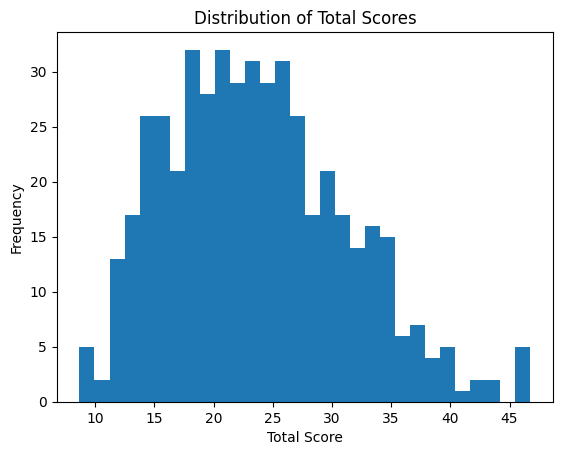

In [125]:
plt.hist(esg_data['Total Score'], bins=30)
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.title('Distribution of Total Scores')
plt.show()

In [126]:
min = 100
max = 0
for ticker in top10_list:
  score = esg_data.loc[esg_data['Ticker'] == ticker]["Total Score"].values[0]
  if score < min:
    min = score
  if score > max:
    max = score
print(f"Min: {min}")
print(f"Max: {max}")

Min: 8.67
Max: 14.33


In [127]:
min = 100
max = 0
for ticker in bottom10_list:
  score = esg_data.loc[esg_data['Ticker'] == ticker]["Total Score"].values[0]
  if score < min:
    min = score
  if score > max:
    max = score
print(f"Min: {min}")
print(f"Max: {max}")

Min: 34.05
Max: 46.76


## Data for Top 10%

In [128]:
top10_data = firm_data_pivoted[top10_list]
bottom10_data = firm_data_pivoted[bottom10_list]


In [129]:
top10_data.head()

Ticker,CBRE,TDY,TEL,PLD,KEYS,REG,CDW,ACN,APD,MTD,...,VTR,KIM,BXP,EXR,LKQ,EQR,DLR,PANW,PARA,TPR
Time,,,,,,,,,,,,,,,,,,,,,
2020-01-02,61.480000,357.489990,88.929115,78.221481,104.190002,50.345943,135.815353,195.263565,206.406891,805.059998,...,46.362537,15.810355,107.019051,88.267998,33.247944,66.575996,99.024719,39.235001,36.654076,23.835154
2020-01-03,60.970001,360.049988,87.878647,79.097481,101.879997,50.941799,134.182327,194.938370,201.816895,789.539978,...,46.921612,15.979752,107.855782,89.776634,32.867176,67.435646,100.652779,39.471664,36.096733,23.826302
2020-01-06,60.689999,358.630005,87.270523,78.787788,100.139999,51.072403,133.172318,193.665405,201.727600,793.729980,...,47.406685,16.189484,108.613541,89.717644,32.374954,67.627602,99.746429,40.043331,36.627956,24.127230
2020-01-07,60.619999,361.089996,89.076553,78.283401,100.779999,50.345943,133.021240,189.484192,202.584869,797.159973,...,47.012051,15.995888,106.726990,89.313103,32.198498,66.626060,98.764572,40.273335,36.688911,24.357351
2020-01-08,60.200001,361.549988,89.998009,78.708107,101.070000,50.754066,132.823059,189.855850,203.683258,797.070007,...,46.781849,15.931351,106.158669,89.490089,32.124207,66.767960,99.620537,39.761665,36.462490,24.516665


<Axes: xlabel='Time'>

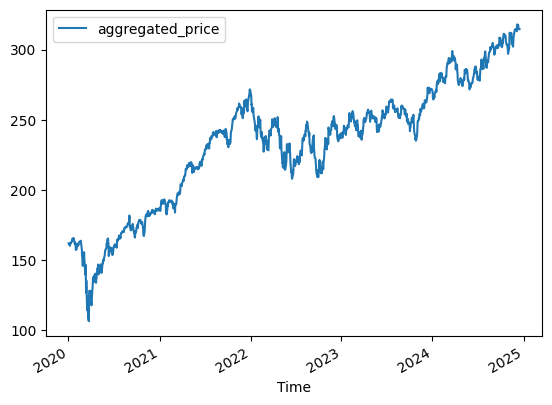

In [130]:
# Calculate the daily average of stock prices across all companies and create new dataframe for aggregate price for each day
top10_single_price = top10_data.mean(axis=1)

top10_single_price = pd.DataFrame(top10_single_price, columns=['aggregated_price'])

top10_single_price.plot()


In [131]:
top10_single_price.to_csv('/content/drive/MyDrive/data/top10_single_price.csv', index=True)

In [132]:
top10_single_price.head()

,aggregated_price
Time,
2020-01-02,162.079213
2020-01-03,161.342811
2020-01-06,161.043235
2020-01-07,160.254208
2020-01-08,161.178471


## Data for Bottom 10%

In [133]:
bottom10_data.head()

Ticker,EOG,EPAM,GEN,GNRC,GE,TSN,PCG,ODFL,OXY,TDG,...,STE,SMCI,SYK,LLY,LIN,LYV,ZBH,ADM,AEE,MCHP
Time,,,,,,,,,,,,,,,,,,,,,
2020-01-02,66.358421,216.309998,13.458229,102.010002,58.255905,78.018105,10.825624,62.729153,39.718475,504.052002,...,144.938934,2.363,199.708191,123.915504,195.989319,71.889999,139.626236,40.313679,65.907440,49.494110
2020-01-03,67.028786,217.399994,13.359954,101.669998,58.451244,78.547073,10.546252,61.981094,40.679256,513.290283,...,143.916626,2.344,198.892120,123.503075,190.892883,71.639999,139.261230,40.234997,65.933426,48.408546
2020-01-06,69.749695,214.199997,13.649601,101.250000,59.281368,78.174187,10.356680,61.491093,42.022484,519.472778,...,144.862488,2.327,201.387833,123.962372,190.083786,71.739998,138.456436,39.920254,65.994102,47.713974
2020-01-07,70.420059,215.610001,13.835807,102.900002,58.841888,77.038208,10.556231,61.667492,42.227699,521.427063,...,144.308350,2.310,198.920578,124.196648,190.492996,70.910004,138.334763,39.439396,66.236748,50.915447
2020-01-08,68.882149,221.380005,13.763393,100.029999,58.304745,77.515144,10.586163,61.958218,41.957188,520.210083,...,144.222336,2.307,199.935974,125.321404,192.873779,71.690002,139.991211,39.002247,66.124084,50.271473


<Axes: xlabel='Time'>

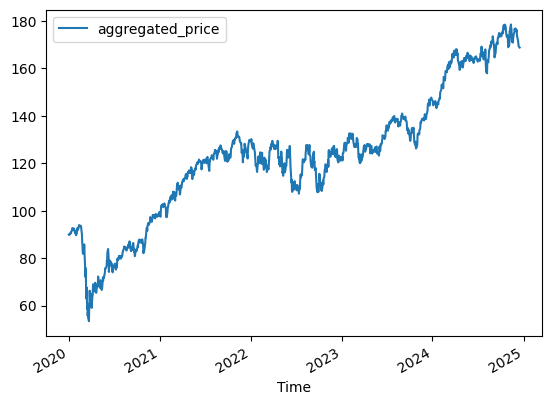

In [134]:
bottom10_single_price = bottom10_data.mean(axis=1)

bottom10_single_price = pd.DataFrame(bottom10_single_price, columns=['aggregated_price'])

bottom10_single_price.plot()

In [135]:
bottom10_single_price.to_csv('/content/drive/MyDrive/data/bottom10_single_price.csv', index=True)


In [136]:
bottom10_single_price = bottom10_single_price.dropna()

# Time Series Model

In [137]:
pip install sktime

In [138]:
import sktime as skt
from sktime.utils.plotting import plot_correlations, plot_series
from sktime.split import temporal_train_test_split

In [139]:
import matplotlib.pyplot as plt
import numpy as np

In [140]:
top10_single_price.head()

,aggregated_price
Time,
2020-01-02,162.079213
2020-01-03,161.342811
2020-01-06,161.043235
2020-01-07,160.254208
2020-01-08,161.178471


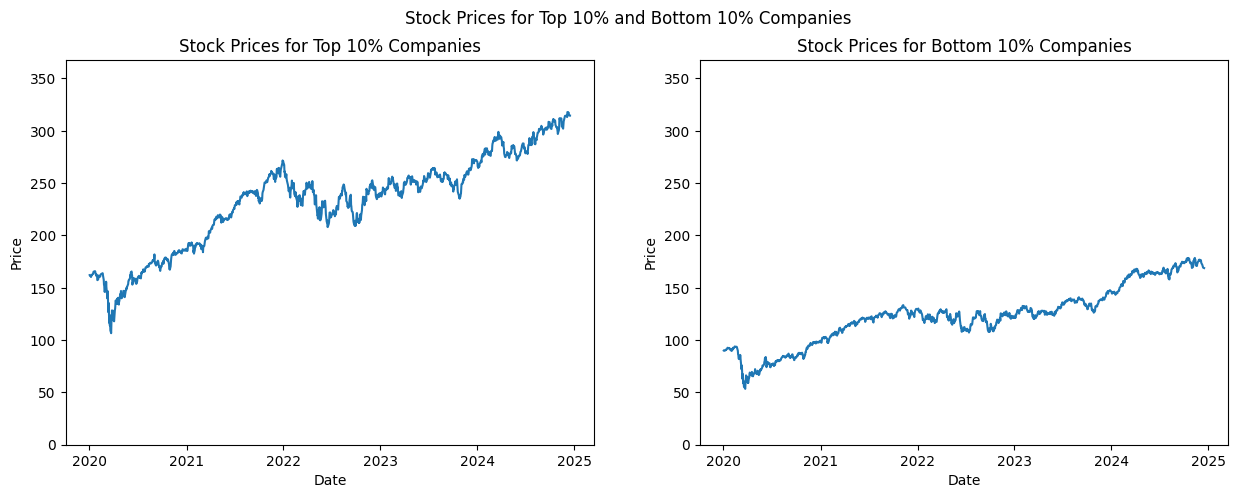

In [141]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].plot(top10_single_price['aggregated_price'])
ax[0].set_title('Stock Prices for Top 10% Companies')
ax[1].plot(bottom10_single_price["aggregated_price"])
ax[1].set_title('Stock Prices for Bottom 10% Companies')
#min_price = min(top10_single_price['aggregated_price'].min(), bottom10_single_price['aggregated_price'].min())
max_price = np.maximum(top10_single_price['aggregated_price'].max(), bottom10_single_price['aggregated_price'].max())+50
ax[0].set_ylim(0, max_price)
ax[1].set_ylim(0, max_price)
ax[0].set_xlabel('Date')
ax[1].set_xlabel('Date')
ax[0].set_ylabel('Price')
ax[1].set_ylabel('Price')
fig.suptitle('Stock Prices for Top 10% and Bottom 10% Companies')
plt.show()


## Top 10%

In [142]:
import pandas as pd
import datetime as dt

In [143]:
#top10_single_price = pd.read_csv('/content/drive/MyDrive/data/top10_single_price.csv')

In [144]:
top10_single_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1248 entries, 2020-01-02 to 2024-12-16
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   aggregated_price  1248 non-null   float64
dtypes: float64(1)
memory usage: 19.5 KB


In [145]:
#top10_single_price["Time"] = pd.to_datetime(top10_single_price["Time"])
#top10_single_price.set_index('Time', inplace = True)
top10_single_price = top10_single_price.asfreq('D')

In [146]:
top10_single_price = top10_single_price.ffill()

In [147]:
top10_single_price

,aggregated_price
Time,
2020-01-02,162.079213
2020-01-03,161.342811
2020-01-04,161.342811
2020-01-05,161.342811
2020-01-06,161.043235
...,...
2024-12-12,314.945522
2024-12-13,314.505415
2024-12-14,314.505415


In [148]:
X_train, X_test = temporal_train_test_split(top10_single_price)

In [149]:
X_train.head()

,aggregated_price
Time,
2020-01-02,162.079213
2020-01-03,161.342811
2020-01-04,161.342811
2020-01-05,161.342811
2020-01-06,161.043235


Text(0.5, 1.0, 'Stock Prices for Top 10% Companies')

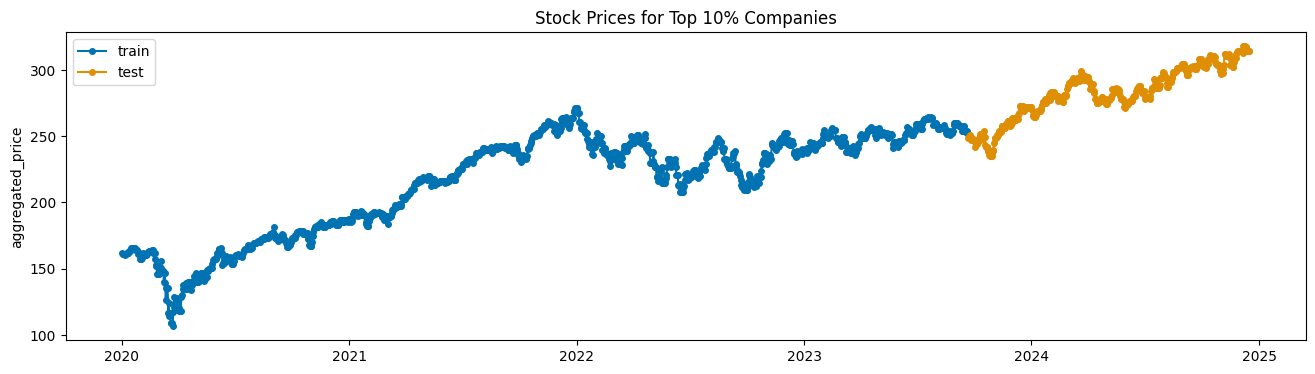

In [150]:
plot_series(X_train, X_test, labels = ['train', 'test'])
plt.title("Stock Prices for Top 10% Companies")

### Naive Forecaster

In [151]:
from sktime.forecasting.naive import NaiveForecaster

In [152]:
forecaster = NaiveForecaster()

In [153]:
forecaster.fit(X_train)

NaiveForecaster()

In [154]:
top_predictions = X_test.copy()
top_predictions.head()



,aggregated_price
2023-09-21,248.747232
2023-09-22,249.704135
2023-09-23,249.704135
2023-09-24,249.704135
2023-09-25,250.616091


In [155]:
top_predictions["naive"] = forecaster.predict(fh=[i for i in range(1, X_test.shape[0] + 1)])

Text(0.5, 1.0, 'Naive Forecaster for Top 10% Companies')

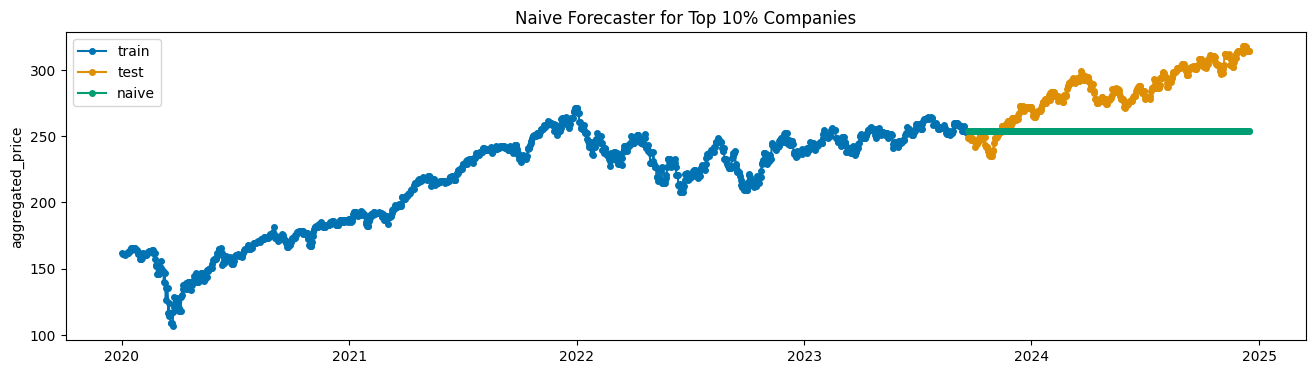

In [156]:
plot_series(X_train, X_test, top_predictions["naive"], labels = ['train', 'test', 'naive'])
plt.title("Naive Forecaster for Top 10% Companies")

In [157]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [158]:
np.sqrt(mean_squared_error(top_predictions["naive"], X_test))

34.67659163783596

### Seasonal

In [159]:
top_predictions['seasonal'] = X_train.iloc[-(X_test.shape[0]):].values

Text(0.5, 1.0, 'Seasonal Forecaster for Top 10% Companies')

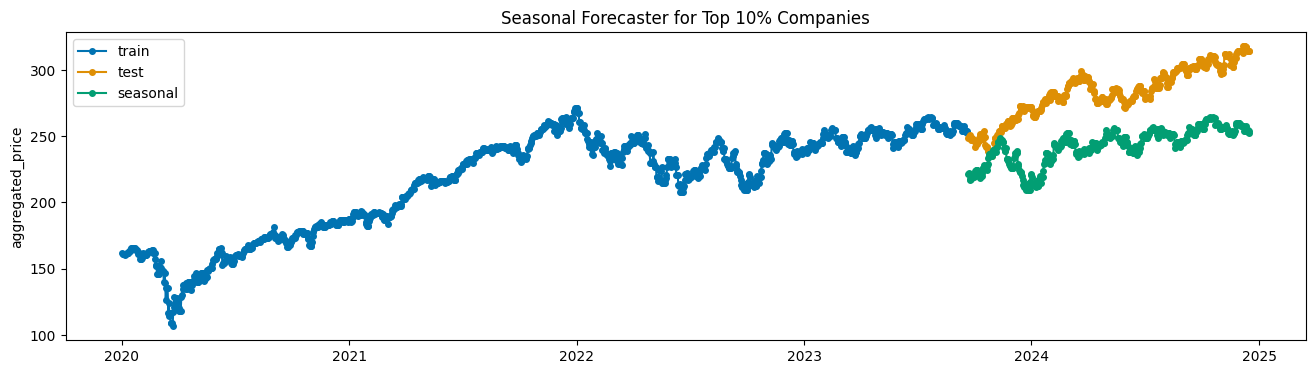

In [160]:
plot_series(X_train, X_test, top_predictions["seasonal"], labels = ['train', 'test', 'seasonal'])
plt.title("Seasonal Forecaster for Top 10% Companies")

In [161]:
np.sqrt(mean_squared_error(top_predictions["seasonal"], X_test))

42.47923751630332

### Holt and Winter


In [162]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [163]:
hw = ExponentialSmoothing(trend = 'add', seasonal = 'additive', sp = 365)
hw.fit(X_train)
hw.predict(fh = [i for i in range(X_test.shape[0]+1)])
top_predictions['hw'] = hw.predict(fh = [i for i in range(X_test.shape[0]+1)])
top_predictions.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,aggregated_price,naive,seasonal,hw
2023-09-21,248.747232,254.300365,221.855420,252.676023
2023-09-22,249.704135,254.300365,221.855420,252.650423
2023-09-23,249.704135,254.300365,221.861131,251.566793
2023-09-24,249.704135,254.300365,217.130255,251.341166
2023-09-25,250.616091,254.300365,218.026031,252.025748


Text(0.5, 1.0, 'Holt-Winters Forecaster for Top 10% Companies')

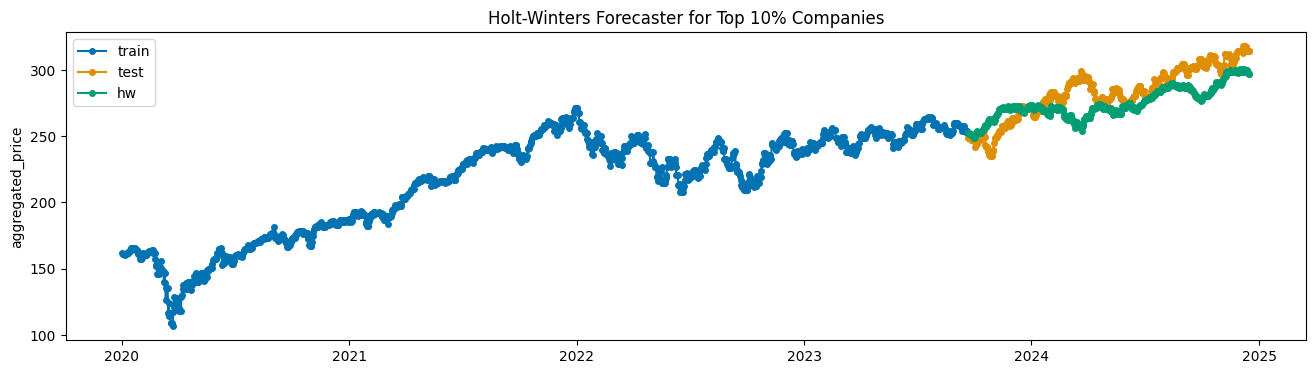

In [164]:
plot_series(X_train, X_test, top_predictions["hw"], labels = ['train', 'test', 'hw'])
plt.title("Holt-Winters Forecaster for Top 10% Companies")

In [165]:
np.sqrt(mean_squared_error(top_predictions["hw"], X_test))

15.369667060595248

### Auto Reg


In [166]:
from sktime.forecasting.auto_reg import AutoREG

In [167]:
ar = AutoREG(lags = 365)
ar.fit(X_train)
ar_preds = ar.predict(fh = [i for i in range(X_test.shape[0]+1)])
top_predictions['ar'] = ar_preds
top_predictions.head()


,aggregated_price,naive,seasonal,hw,ar
2023-09-21,248.747232,254.300365,221.855420,252.676023,258.485199
2023-09-22,249.704135,254.300365,221.855420,252.650423,258.003981
2023-09-23,249.704135,254.300365,221.861131,251.566793,258.284524
2023-09-24,249.704135,254.300365,217.130255,251.341166,258.957942
2023-09-25,250.616091,254.300365,218.026031,252.025748,258.199610


Text(0.5, 1.0, 'Auto Regressor Forecaster for Top 10% Companies')

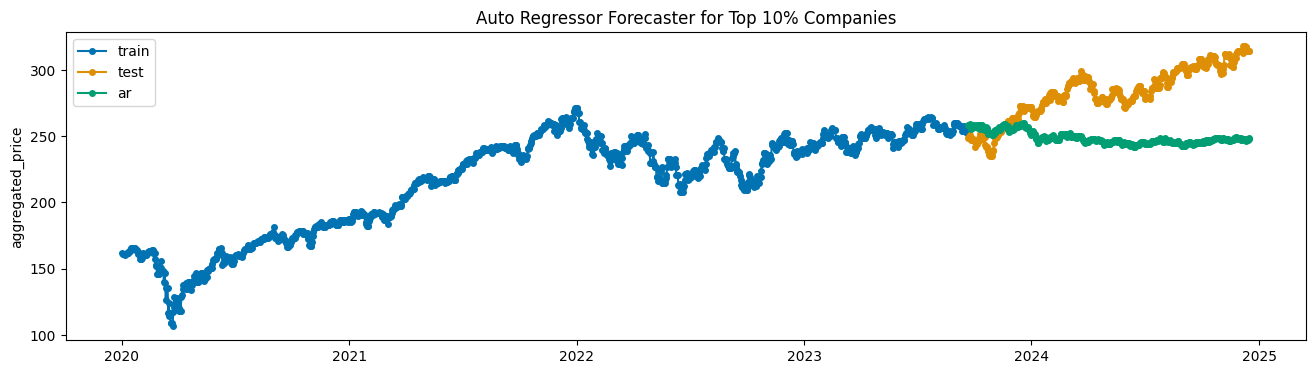

In [168]:
plot_series(X_train, X_test, top_predictions["ar"], labels = ['train', 'test', 'ar'])
plt.title("Auto Regressor Forecaster for Top 10% Companies")

In [169]:
np.sqrt(mean_squared_error(top_predictions["ar"], X_test))

40.91323444820674

### Facebook Prophet

In [170]:
!pip install prophet


In [171]:
from prophet import Prophet


In [172]:
X_train_prophet = X_train.reset_index()
X_train_prophet.columns = ['ds', 'y']
X_train_prophet.head()

,ds,y
0,2020-01-02,162.079213
1,2020-01-03,161.342811
2,2020-01-04,161.342811
3,2020-01-05,161.342811
4,2020-01-06,161.043235


In [173]:
m = Prophet()
m.fit(X_train_prophet)
future = m.make_future_dataframe(periods=X_test.shape[0]+1)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjwrvmiph/zq_k3vyt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjwrvmiph/g5r9s75n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1012', 'data', 'file=/tmp/tmpjwrvmiph/zq_k3vyt.json', 'init=/tmp/tmpjwrvmiph/g5r9s75n.json', 'output', 'file=/tmp/tmpjwrvmiph/prophet_modelcttk267_/prophet_model-20241216200656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:06:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:06:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [174]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast.set_index('ds', inplace=True)
top_predictions['prophet'] = forecast['yhat']
top_predictions.head()

,aggregated_price,naive,seasonal,hw,ar,prophet
2023-09-21,248.747232,254.300365,221.855420,252.676023,258.485199,250.263145
2023-09-22,249.704135,254.300365,221.855420,252.650423,258.003981,249.735281
2023-09-23,249.704135,254.300365,221.861131,251.566793,258.284524,249.085270
2023-09-24,249.704135,254.300365,217.130255,251.341166,258.957942,248.453646
2023-09-25,250.616091,254.300365,218.026031,252.025748,258.199610,247.961497


Text(0.5, 1.0, 'Prophet Forecaster for Top 10% Companies')

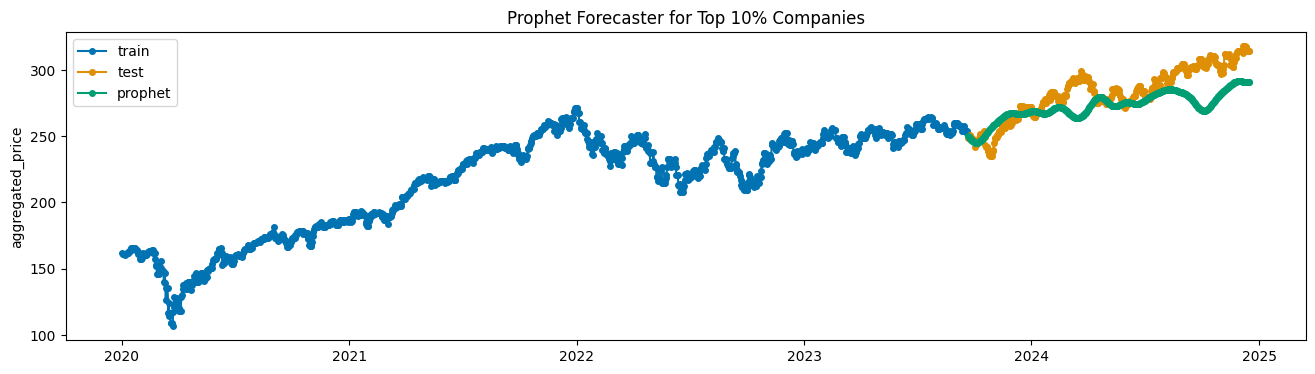

In [175]:
plot_series(X_train, X_test, top_predictions["prophet"], labels = ['train', 'test', 'prophet'])
plt.title("Prophet Forecaster for Top 10% Companies")

In [176]:
np.sqrt(mean_squared_error(top_predictions["prophet"], X_test))

16.554130862535207

### Model Performance

In [177]:
print(f"RMSE for Naive Forecaster: {np.sqrt(mean_squared_error(top_predictions['naive'], X_test))}")
print(f"RMSE for Seasonal Forecaster: {np.sqrt(mean_squared_error(top_predictions['seasonal'], X_test))}")
print(f"RMSE for Holt-Winters Forecaster: {np.sqrt(mean_squared_error(top_predictions['hw'], X_test))}")
print(f"RMSE for AutoReg Forecaster: {np.sqrt(mean_squared_error(top_predictions['ar'], X_test))}")
print(f"RMSE for Prophet Forecaster: {np.sqrt(mean_squared_error(top_predictions['prophet'], X_test))}")

RMSE for Naive Forecaster: 34.67659163783596
RMSE for Seasonal Forecaster: 42.47923751630332
RMSE for Holt-Winters Forecaster: 15.369667060595248
RMSE for AutoReg Forecaster: 40.91323444820674
RMSE for Prophet Forecaster: 16.554130862535207


## Bottom 10%

In [181]:
#bottom10_single_price = pd.read_csv('/content/drive/MyDrive/data/bottom10_single_price.csv')

In [182]:
bottom10_single_price.head()

,aggregated_price
Time,
2020-01-02,89.928041
2020-01-03,89.721096
2020-01-06,89.903326
2020-01-07,90.153490
2020-01-08,90.191946


In [183]:
#bottom10_single_price["Time"] = pd.to_datetime(bottom10_single_price["Time"])
#bottom10_single_price.set_index('Time', inplace = True)


In [184]:
bottom10_single_price = bottom10_single_price.asfreq('D')

In [185]:
bottom10_single_price = bottom10_single_price.ffill()

In [186]:
bottom10_single_price.head()

,aggregated_price
Time,
2020-01-02,89.928041
2020-01-03,89.721096
2020-01-04,89.721096
2020-01-05,89.721096
2020-01-06,89.903326


In [187]:
X_train, X_test = temporal_train_test_split(bottom10_single_price)

In [188]:
X_train.head(2)

,aggregated_price
Time,
2020-01-02,89.928041
2020-01-03,89.721096


Text(0.5, 1.0, 'Stock Prices for Bottom 10% Companies')

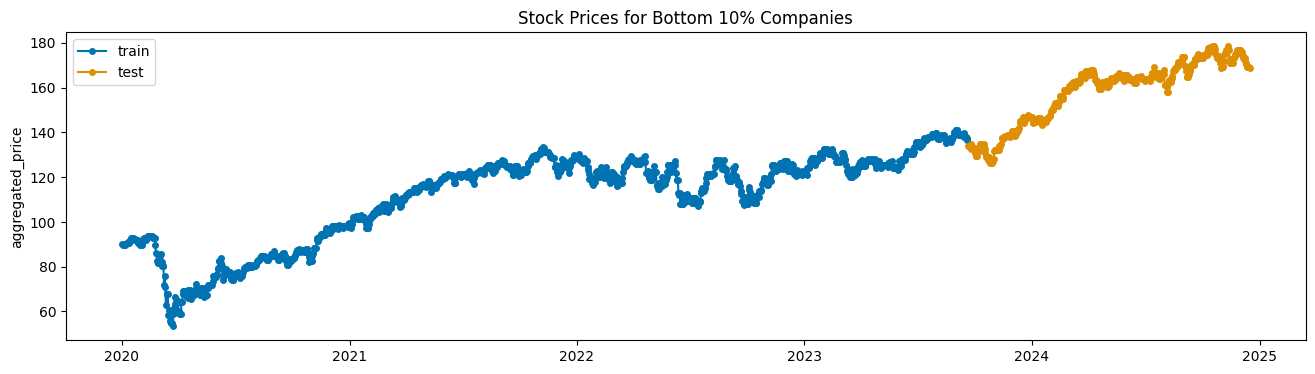

In [189]:
plot_series(X_train, X_test, labels = ['train', 'test'])
plt.title("Stock Prices for Bottom 10% Companies")

### Naive Forecaster

In [190]:
forecaster = NaiveForecaster()

In [191]:
forecaster.fit(X_train)

NaiveForecaster()

In [192]:
bottom_predictions = X_test.copy()
bottom_predictions.head()



,aggregated_price
2023-09-21,133.961551
2023-09-22,133.918850
2023-09-23,133.918850
2023-09-24,133.918850
2023-09-25,134.766266


In [193]:
bottom_predictions["naive"] = forecaster.predict(fh=[i for i in range(1, X_test.shape[0] + 1)])

Text(0.5, 1.0, 'Naive Forecaster for Bottom 10% Companies')

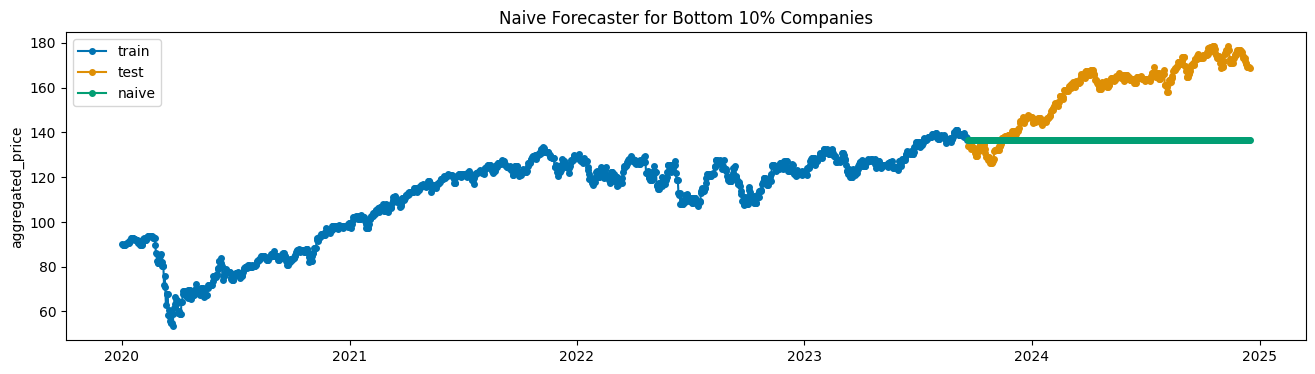

In [194]:
plot_series(X_train, X_test, bottom_predictions["naive"], labels = ['train', 'test', 'naive'])
plt.title("Naive Forecaster for Bottom 10% Companies")

In [195]:
np.sqrt(mean_squared_error(bottom_predictions["naive"], X_test))

26.03092546914163

### Seasonal

In [196]:
bottom_predictions['seasonal'] = X_train.iloc[-(X_test.shape[0]):].values

Text(0.5, 1.0, 'Seasonal Forecaster for Bottom 10% Companies')

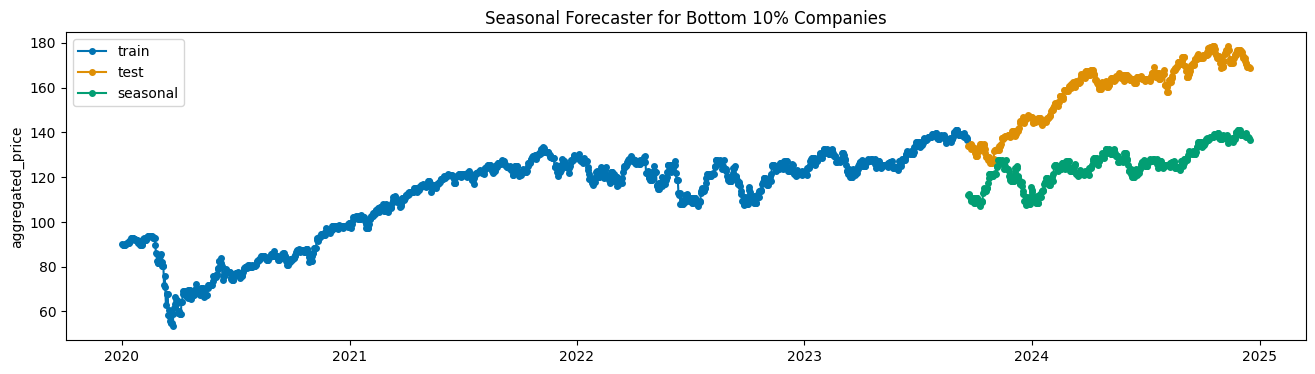

In [197]:
plot_series(X_train, X_test, bottom_predictions["seasonal"], labels = ['train', 'test','seasonal'])
plt.title("Seasonal Forecaster for Bottom 10% Companies")

In [198]:
np.sqrt(mean_squared_error(bottom_predictions["seasonal"], X_test))

34.25506972871904

### Holt Winters'

In [199]:
hw = ExponentialSmoothing(trend = 'add', seasonal = 'additive', sp = 365)
hw.fit(X_train)
hw.predict(fh = [i for i in range(X_test.shape[0]+1)])
bottom_predictions['hw'] = hw.predict(fh = [i for i in range(X_test.shape[0]+1)])
bottom_predictions.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,aggregated_price,naive,seasonal,hw
2023-09-21,133.961551,136.496947,111.988786,134.946108
2023-09-22,133.918850,136.496947,111.988786,135.317804
2023-09-23,133.918850,136.496947,112.416299,134.294263
2023-09-24,133.918850,136.496947,111.182365,134.308103
2023-09-25,134.766266,136.496947,110.199977,134.764254


Text(0.5, 1.0, 'Holt-Winters Forecaster for Bottom 10% Companies')

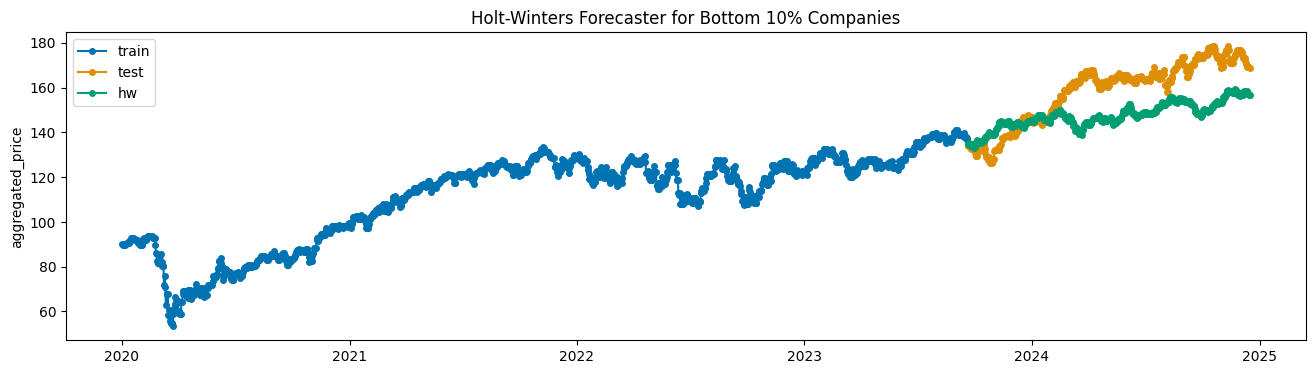

In [200]:
plot_series(X_train, X_test, bottom_predictions["hw"], labels = ['train', 'test', 'hw'])
plt.title("Holt-Winters Forecaster for Bottom 10% Companies")

In [201]:
np.sqrt(mean_squared_error(bottom_predictions["hw"], X_test))

14.94254731166759

### Auto Reg

In [202]:
ar = AutoREG(lags = 365)
ar.fit(X_train)
ar_preds = ar.predict(fh = [i for i in range(X_test.shape[0]+1)])
bottom_predictions['ar'] = ar_preds
bottom_predictions.head()

,aggregated_price,naive,seasonal,hw,ar
2023-09-21,133.961551,136.496947,111.988786,134.946108,137.279821
2023-09-22,133.918850,136.496947,111.988786,135.317804,135.578535
2023-09-23,133.918850,136.496947,112.416299,134.294263,135.870618
2023-09-24,133.918850,136.496947,111.182365,134.308103,135.287288
2023-09-25,134.766266,136.496947,110.199977,134.764254,135.739266


Text(0.5, 1.0, 'Auto Regressor Forecaster for Bottom 10% Companies')

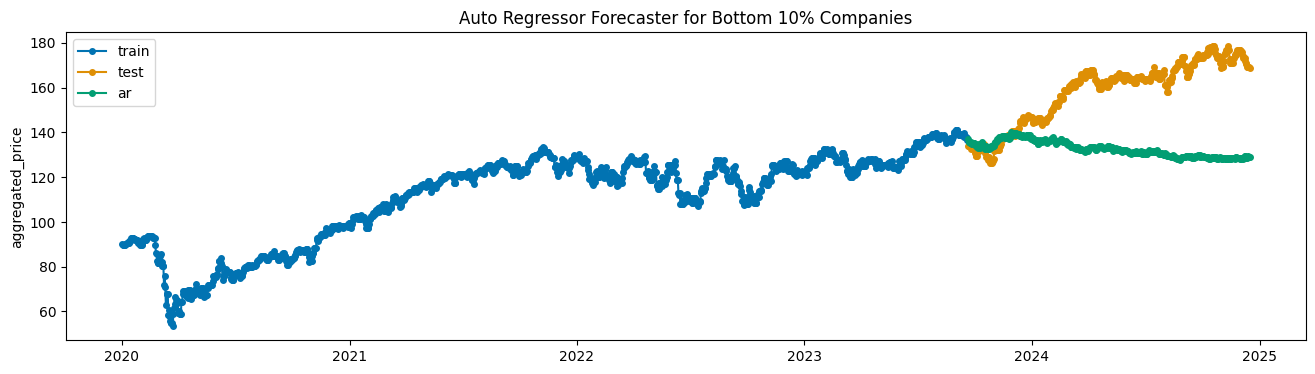

In [203]:
plot_series(X_train, X_test, bottom_predictions["ar"], labels = ['train', 'test', 'ar'])
plt.title("Auto Regressor Forecaster for Bottom 10% Companies")

In [204]:
np.sqrt(mean_squared_error(bottom_predictions["ar"], X_test))

30.759400322056557

### Facebook Prophet

In [205]:
X_train_prophet = X_train.reset_index()
X_train_prophet.columns = ['ds', 'y']
X_train_prophet.head()

,ds,y
0,2020-01-02,89.928041
1,2020-01-03,89.721096
2,2020-01-04,89.721096
3,2020-01-05,89.721096
4,2020-01-06,89.903326


In [206]:
m = Prophet()
m.fit(X_train_prophet)
future = m.make_future_dataframe(periods=X_test.shape[0]+1)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjwrvmiph/g79w734l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjwrvmiph/pmt29ftv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32442', 'data', 'file=/tmp/tmpjwrvmiph/g79w734l.json', 'init=/tmp/tmpjwrvmiph/pmt29ftv.json', 'output', 'file=/tmp/tmpjwrvmiph/prophet_model2eftfdcu/prophet_model-20241216200733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:07:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:07:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [207]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast.set_index('ds', inplace=True)
bottom_predictions['prophet'] = forecast['yhat']
bottom_predictions.head()

,aggregated_price,naive,seasonal,hw,ar,prophet
2023-09-21,133.961551,136.496947,111.988786,134.946108,137.279821,135.860364
2023-09-22,133.918850,136.496947,111.988786,135.317804,135.578535,135.664454
2023-09-23,133.918850,136.496947,112.416299,134.294263,135.870618,135.393522
2023-09-24,133.918850,136.496947,111.182365,134.308103,135.287288,135.132693
2023-09-25,134.766266,136.496947,110.199977,134.764254,135.739266,134.885668


Text(0.5, 1.0, 'Prophet Forecaster for Bottom 10% Companies')

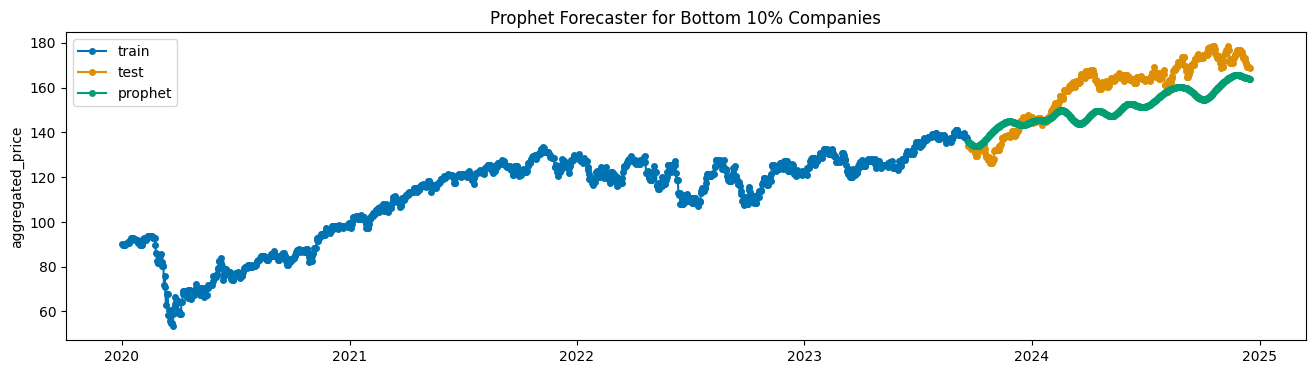

In [208]:
plot_series(X_train, X_test, bottom_predictions["prophet"], labels = ['train', 'test', 'prophet'])
plt.title("Prophet Forecaster for Bottom 10% Companies")

In [209]:
np.sqrt(mean_squared_error(bottom_predictions["prophet"], X_test))

11.544198470210432

### Model Performance

In [210]:
print(f"RMSE for Naive Forecaster: {np.sqrt(mean_squared_error(bottom_predictions['naive'], X_test))}")
print(f"RMSE for Seasonal Forecaster: {np.sqrt(mean_squared_error(bottom_predictions['seasonal'], X_test))}")
print(f"RMSE for Holt-Winters Forecaster: {np.sqrt(mean_squared_error(bottom_predictions['hw'], X_test))}")
print(f"RMSE for AutoReg Forecaster: {np.sqrt(mean_squared_error(bottom_predictions['ar'], X_test))}")
print(f"RMSE for Prophet Forecaster: {np.sqrt(mean_squared_error(bottom_predictions['prophet'], X_test))}")

RMSE for Naive Forecaster: 26.03092546914163
RMSE for Seasonal Forecaster: 34.25506972871904
RMSE for Holt-Winters Forecaster: 14.94254731166759
RMSE for AutoReg Forecaster: 30.759400322056557
RMSE for Prophet Forecaster: 11.544198470210432


#Prediction

##  Top

In [211]:
top_prophet = top10_single_price.reset_index()
top_prophet.columns = ['ds', 'y']
top_prophet.tail()


,ds,y
1806,2024-12-12,314.945522
1807,2024-12-13,314.505415
1808,2024-12-14,314.505415
1809,2024-12-15,314.505415
1810,2024-12-16,314.470481


In [212]:
m = Prophet()
m.fit(top_prophet)
top_future = m.make_future_dataframe(periods=30)
top_forecast = m.predict(top_future)
top_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjwrvmiph/rys1l5ww.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjwrvmiph/wn5e_sz_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14192', 'data', 'file=/tmp/tmpjwrvmiph/rys1l5ww.json', 'init=/tmp/tmpjwrvmiph/wn5e_sz_.json', 'output', 'file=/tmp/tmpjwrvmiph/prophet_model9bhnhq2k/prophet_model-20241216200747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:07:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:07:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1836,2025-01-11,322.364656,314.149352,330.913440
1837,2025-01-12,322.312518,314.171688,331.335149
1838,2025-01-13,322.410601,313.615528,330.863566
1839,2025-01-14,322.517063,313.876949,330.910036
1840,2025-01-15,322.588862,313.931520,331.393095


Text(83.34722222222221, 0.5, 'Stock Price')

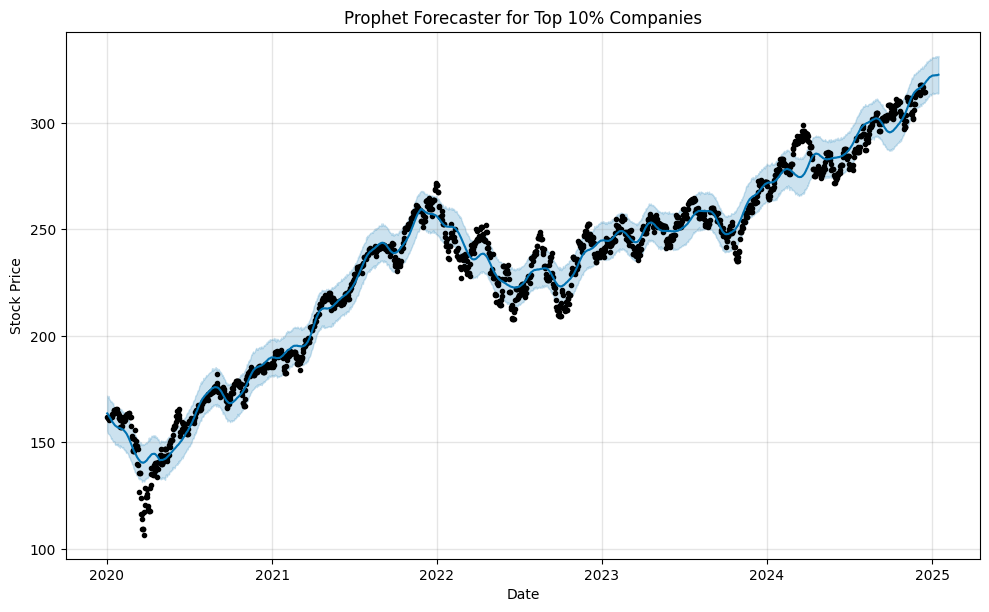

In [213]:
m.plot(top_forecast);
plt.title("Prophet Forecaster for Top 10% Companies")
plt.xlabel("Date")
plt.ylabel("Stock Price")

## Bottom


In [214]:
bottom_prophet = bottom10_single_price.reset_index()
bottom_prophet.columns = ['ds', 'y']
bottom_prophet.tail()

,ds,y
1806,2024-12-12,169.359584
1807,2024-12-13,169.079374
1808,2024-12-14,169.079374
1809,2024-12-15,169.079374
1810,2024-12-16,168.774157


In [215]:
m = Prophet()
m.fit(bottom_prophet)
bottom_future = m.make_future_dataframe(periods=30)
bottom_forecast = m.predict(bottom_future)
bottom_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjwrvmiph/i681f3rm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjwrvmiph/cm3slijx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49166', 'data', 'file=/tmp/tmpjwrvmiph/i681f3rm.json', 'init=/tmp/tmpjwrvmiph/cm3slijx.json', 'output', 'file=/tmp/tmpjwrvmiph/prophet_modeljd6fv063/prophet_model-20241216200750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:07:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:07:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1836,2025-01-11,183.025617,177.913771,187.801966
1837,2025-01-12,182.996576,177.800774,187.892387
1838,2025-01-13,183.017907,177.658106,188.029915
1839,2025-01-14,183.100862,177.711955,188.166764
1840,2025-01-15,183.090282,177.728961,188.317609


Text(83.22222222222221, 0.5, 'Stock Price')

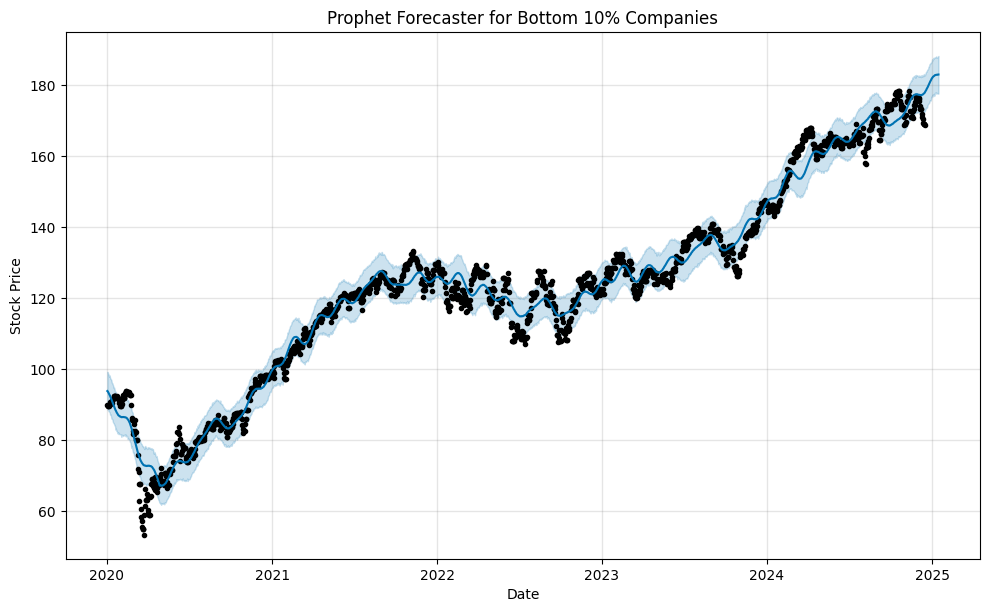

In [216]:
m.plot(bottom_forecast);
plt.title("Prophet Forecaster for Bottom 10% Companies")
plt.xlabel("Date")
plt.ylabel("Stock Price")

## Return

In [217]:
daily_price_T = top_forecast.loc[top_forecast["ds"] > "2024-12-11"]["yhat"]
daily_price_B = bottom_forecast.loc[bottom_forecast["ds"] > "2024-12-11"]["yhat"]

In [218]:
daily_returns_T = np.diff(daily_price_T) / daily_price_T[:-1]
daily_returns_B = np.diff(daily_price_B) / daily_price_B[:-1]

In [219]:
total_return_T = np.prod(1 + daily_returns_T) - 1
total_return_B = np.prod(1 + daily_returns_B) - 1

In [220]:
print(f"Total Predicted Return for Top 10%: {total_return_T * 100:.2f}%")
print(f"Total Predicted Return for Bottom 10%: {total_return_B * 100:.2f}%")

Total Predicted Return for Top 10%: 1.57%
Total Predicted Return for Bottom 10%: 3.15%
